In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Import Data

In [32]:
first_solar_sentiment = pd.read_csv('./first_solar_compound_sentiment_close_time_series.csv')

In [33]:
first_solar_popularity = pd.read_csv('./first_solar_popularity_time_series.csv')

In [34]:
first_solar_popularity = first_solar_popularity.drop('close', axis=1)

In [35]:
first_solar = pd.merge(first_solar_sentiment, first_solar_popularity, how='left', left_on=['Year-Week'], right_on=['Year-Week'])

# Normalize Values

In [36]:
first_solar.set_index('Year-Week', inplace=True)

In [37]:
first_solar.dropna(inplace=True)

<AxesSubplot:xlabel='Year-Week'>

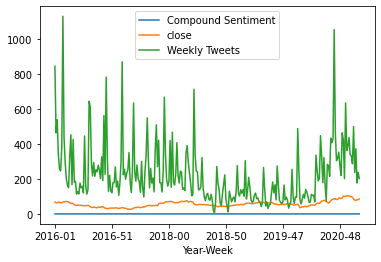

In [38]:
first_solar.plot()

In [22]:
# def normalize_counts(df):
#     max_count = df['Count'].max()
#     min_count = df['Count'].min()
#     df['Count Normalized'] = (df['Count'] - min_count) / (max_count - min_count)
#     return df

In [23]:
first_solar.columns

Index(['Compound Sentiment', 'close', 'Weekly Tweets'], dtype='object')

In [46]:
def normalize_weekly_tweets(df):
    max_count = df['Weekly Tweets'].max()
    min_count = df['Weekly Tweets'].min()
    df['Tweets Normalized'] = (df['Weekly Tweets'] - min_count) / (max_count - min_count)
    return df

def normalize_close(df):
    max_count = df['close'].max()
    min_count = df['close'].min()
    df['close Normalized'] = (df['close'] - min_count) / (max_count - min_count)
    return df

def normalize_compound_sentiment(df):
    max_count = df['Compound Sentiment'].max()
    min_count = df['Compound Sentiment'].min()
    df['Compound Sentiment Normalized'] = (df['Compound Sentiment'] - min_count) / (max_count - min_count)
    return df


In [47]:
first_solar_normalize_weekly_tweets = normalize_weekly_tweets(first_solar)

In [48]:
first_solar_close_normalized = normalize_close(first_solar_normalize_weekly_tweets)

In [49]:
first_solar_normalized = normalize_compound_sentiment(first_solar_close_normalized)

In [61]:
first_solar_close_normalized.columns

Index(['Compound Sentiment', 'close', 'Weekly Tweets', 'Tweets Normalized',
       'close Normalized', 'Compound Sentiment Normalized'],
      dtype='object')

<AxesSubplot:xlabel='Year-Week'>

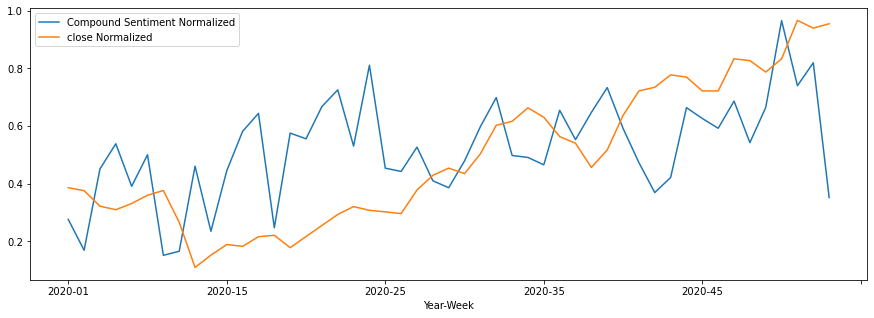

In [72]:
first_solar_normalized[['Compound Sentiment Normalized', 'close Normalized']]['2020-01':'2021-01'].plot(figsize=(15,5))
# first_solar_normalized[['Compound Sentiment Normalized', 'close Normalized','Tweets Normalized']]['2020-01':].plot(figsize=(15,5))

<AxesSubplot:xlabel='Year-Week'>

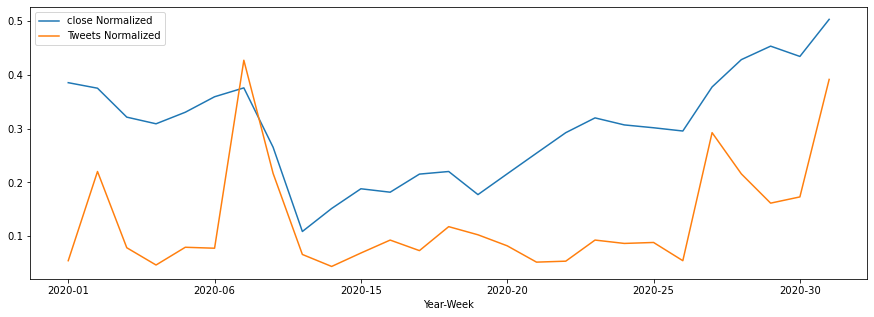

In [80]:
first_solar_normalized[['close Normalized','Tweets Normalized']]['2020-01':'2020-31'].plot(figsize=(15,5))
